[Набор](https://archive.ics.uci.edu/dataset/2/adult) данных UCI Adult (качать не надо, все есть в репозитории): классификация людей с помощью демографических данных для прогнозирования, зарабатывает ли человек более \$ 50 000 в год.

Описание признаков:

**Age** – возраст, количественный признак  
**Workclass** – тип работодателя, количественный признак  
**fnlwgt** – итоговый вес обьекта, количественный признак    
**Education** – уровень образования, качественный признак  
**Education_Num** – количество лет обучения, количественный признак  
**Martial_Status** – семейное положение, категориальный признак  
**Occupation** – профессия, категориальный признак  
**Relationship** – тип семейных отношений, категориальный признак    
**Race** – раса, категориальный признак  
**Sex** – пол, качественный признак  
**Capital_Gain** – прирост капитала, количественный признак  
**Capital_Loss** – потери капитала, количественный признак  
**Hours_per_week** – количество часов работы в неделю, количественный признак  
**Country** – страна, категориальный признак  
   
Целевая переменная: **Target** – уровень заработка, категориальный (бинарный) признак

1. Выполнить разведочный анализ данных, заполнить пропуски, преобразовать категориальные данные в числовые:
    - Кодируем категориальные признаки 'Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country'. Это можно сделать с помощью метода pandas get_dummies.
    
2. В тестовой выборке не оказалось Голландии. Завести необходимый признак из нулей.

3. Обучить LogisticRegression(). Использовать в качестве baseline.
4. Обучить k-NN, SVC, Naive Bayes, DecisionTree, RandomForest
5. Обучить SVC с такими параметрами {'classifier__gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
6. Обучить DecisionTreeClassifier c параметрами tree_params = {'max_depth': range(2,11)}
7. Обучить RandomForestClassifier c параметрами forest_params = {'max_depth': range(10, 21), 'max_features': range(5, 105, 10)}
8. Использовать кроссвалидацию и GridSearchCV.
9. Сравнить все модели с baseline
10. Вывести confusion matrix


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split # разбиение данных на тренировочные и тестовые

from sklearn.compose import ColumnTransformer # преобразование столбцов
from sklearn.preprocessing import OneHotEncoder # кодирование категориальных переменных
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler # нормализация и масштабирование данных

from sklearn.linear_model import LogisticRegression # логистическая регрессия
from sklearn.neighbors import KNeighborsClassifier # k-ближайших новых соседей
from sklearn.svm import SVC # SVM для классификации
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Дерево Решений
from sklearn.ensemble import RandomForestClassifier  # Random Forest


from sklearn.tree import plot_tree # отрисовка дерева

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score # кроссвалидация
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV

import gc

sns.set()
%matplotlib inline

import sys
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)

DISPLAY_MAX_ROWS = 20 #20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', 100) # None)
plt.style.use('seaborn-whitegrid')


# plt.rcParams["figure.figsize"] = (20, 15)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_train = pd.read_csv('adult_train.csv', sep=';')
data_train

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data_test = pd.read_csv('adult_test.csv', sep=';')
data_test

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data_train.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            583
Target               0
dtype: int64

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16281 non-null  int64  
 1   Workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_Num   16281 non-null  float64
 5   Martial_Status  16281 non-null  object 
 6   Occupation      15315 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_Gain    16281 non-null  float64
 11  Capital_Loss    16281 non-null  float64
 12  Hours_per_week  16281 non-null  float64
 13  Country         16007 non-null  object 
 14  Target          16281 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.9+ MB


In [ ]:
data_test.isnull().sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education_Num       0
Martial_Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_week      0
Country           274
Target              0
dtype: int64

In [ ]:
nulls_train = data_train.columns[data_train.isna().any()].tolist()
for column in nulls_train:
  data_train[column].fillna( data_train[column].mode()[0], inplace=True)

nulls_test = data_test.columns[data_test.isna().any()].tolist()
for column in nulls_test:
  data_test[column].fillna(data_test[column].mode()[0], inplace=True)

In [ ]:
cat_features = ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']

for i in cat_features:
     data_train[i] = pd.Categorical(data_train[i]).codes

for i in cat_features:
     data_test[i] = pd.Categorical(data_test[i]).codes

data_train

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,<=50K
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,>50K
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,<=50K
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,<=50K


In [ ]:
data_train = data_train[data_train['Country'] != 'Holand-Netherlands']

In [ ]:
labelencoder = LabelEncoder()
data_train['Target'] = labelencoder.fit_transform(data_train['Target'])
data_test['Target'] = labelencoder.fit_transform(data_test['Target'])

In [ ]:
X_train = data_train.loc[:, data_train.columns != 'Target']
y_train = data_train['Target']
X_test = data_test.loc[:, data_test.columns != 'Target']
y_test = data_test['Target']

In [ ]:
def calculate(model):
    model_score_train = model.score(X_train, y_train)
    model_score_test = model.score(X_test, y_test)
    print(f'Train score: {model_score_train}')
    print(f'Test score: {model_score_test}')
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    disp.plot()
    plt.show()

Train score: 0.7988083904057001
Test score: 0.7984767520422579


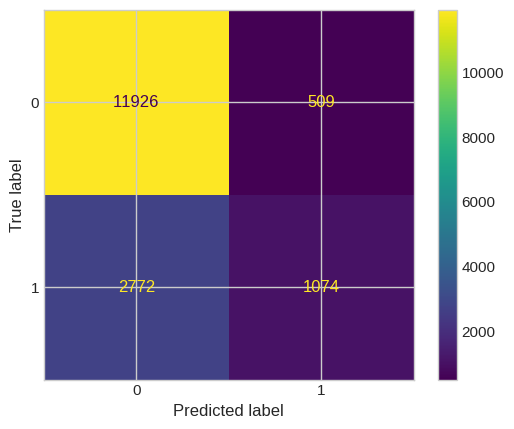

In [ ]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
calculate(logReg)

Train score: 0.836645066183471
Test score: 0.7758737178306001


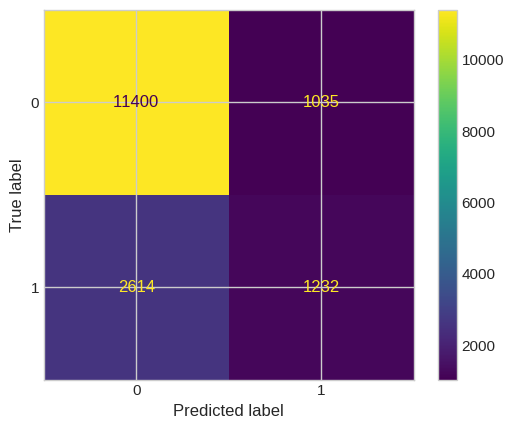

In [ ]:
knnClass = KNeighborsClassifier()
knnClass.fit(X_train, y_train)
calculate(knnClass)

Train score: 0.5239703940296674
Test score: 0.45654443830231556


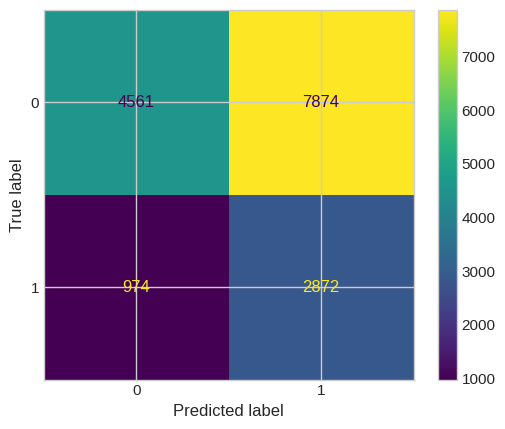

In [ ]:
param_grid={'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter':[100, 200, 500, 1000, 2000]}
grid_search = HalvingGridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, cv = 3)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
calculate(model)

Train score: 0.7952765578452751
Test score: 0.795098581168233


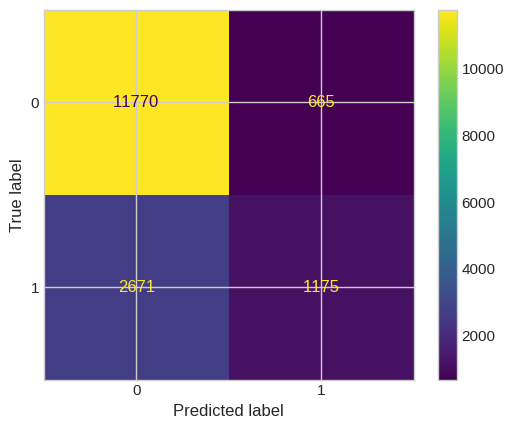

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
calculate(naive_bayes)

Train score: 0.8564847516968153
Test score: 0.853510226644555


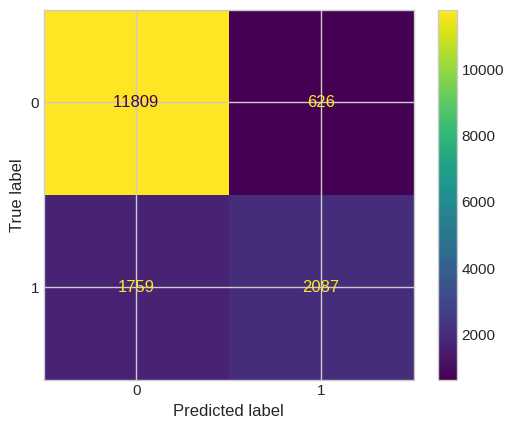

In [ ]:
grid_search = HalvingGridSearchCV(
    DecisionTreeClassifier(),
    param_grid={
        'max_depth': range(2, 11)
        })
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
calculate(model)

Train score: 0.8856914713921563
Test score: 0.8629076838032061


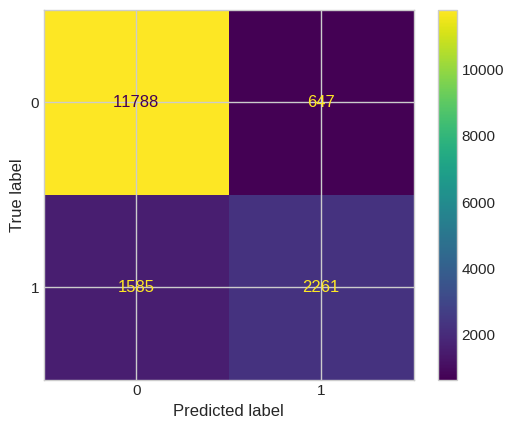

In [ ]:
forestGs = HalvingGridSearchCV(
    RandomForestClassifier(),
    param_grid={
        'max_depth': range(10, 21),
        'max_features': range(5, 105, 10)
        })
forestGs.fit(X_train, y_train)
model = forestGs.best_estimator_
calculate(model)

Лучшая модель на тестовых данных - RandomForestClassifier

# ДЗ № 2

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Найти лучший классификатор (и лучшие параметры) для этого набора данных.
3. Вывести матрицу несоответствия

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Train score: 0.9967256057629339
Test score: 0.9629629629629629


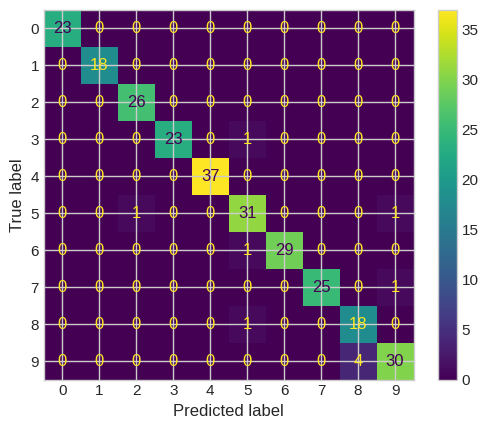

In [ ]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
calculate(model)

Train score: 0.9908316961362148
Test score: 0.9888888888888889


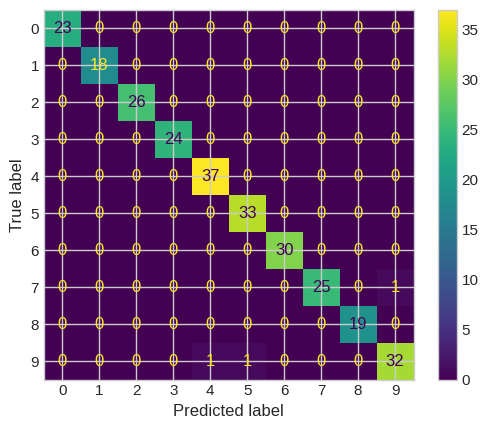

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
calculate(model)

Train score: 0.9980353634577603
Test score: 0.9888888888888889


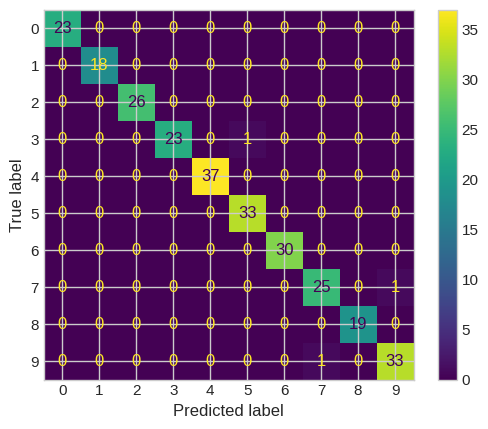

In [ ]:
param_grid={'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter':[100, 200, 500, 1000, 2000]}
grid_search = HalvingGridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, cv = 3)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
calculate(model)

Train score: 0.8546168958742633
Test score: 0.8444444444444444


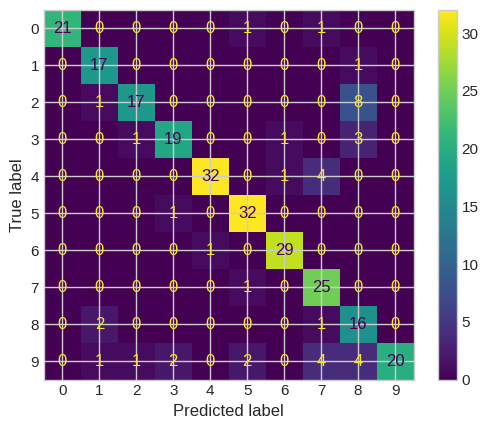

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
calculate(naive_bayes)

Train score: 0.9620170268500328
Test score: 0.8703703703703703


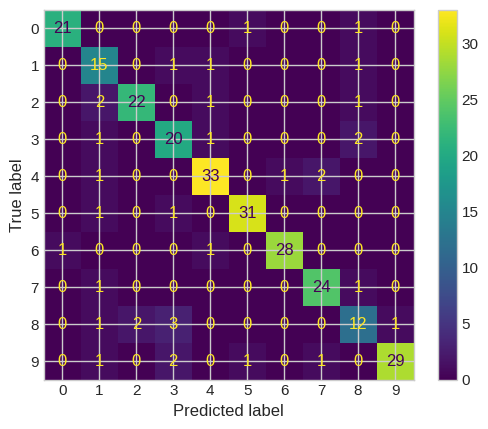

In [ ]:
grid_search = HalvingGridSearchCV(
    DecisionTreeClassifier(),
    param_grid={
        'max_depth': range(2, 11)
        })
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
calculate(model)

Train score: 1.0
Test score: 0.9666666666666667


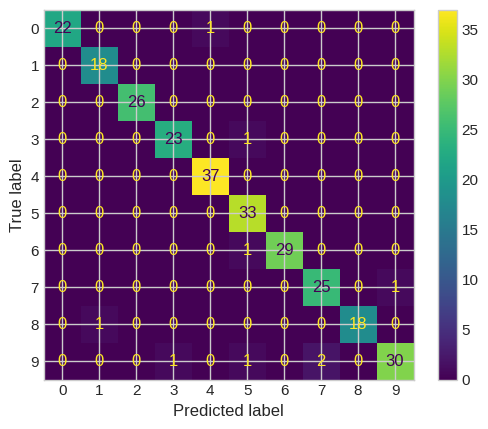

In [ ]:
forestGs = HalvingGridSearchCV(
    RandomForestClassifier(),
    param_grid={
        'max_depth': range(10, 21),
        'max_features': range(5, 105, 10)
        })
forestGs.fit(X_train, y_train)
model = forestGs.best_estimator_
calculate(model)

Лучшие модели на тестовых данных - KNN и SVC